## Import Necessary Libraries 

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

### Read Data 

In [2]:
train = pd.read_csv('train.psv', sep='|')
train.shape

(380282, 41)

In [3]:
train.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

## Distribution of Dependent Variable 

In [4]:
train['SepsisLabel'].value_counts()

0    374680
1      5602
Name: SepsisLabel, dtype: int64

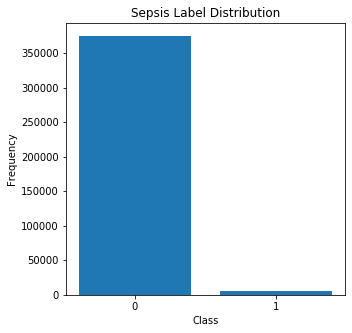

In [8]:
rcParams['figure.figsize'] = 5, 5

plt.bar(train['SepsisLabel'].value_counts().index,
        train['SepsisLabel'].value_counts())
plt.xticks([0,1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')

As we can see from the plot, it is a case of severe class imbalance . There are multiple methods that we could try to balance it (Over sampling or Undersampling) or even proceed without balancing but change the evaluation metric to average precision or roc_auc_sore

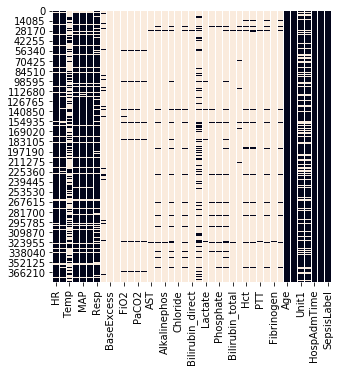

In [9]:
# check for null in features/independemt variables 
sns.heatmap(train.isnull(), cbar=False)

In [10]:
missing = (train.isnull().sum() / train.shape[0])*100
missing

HR                  12.167812
O2Sat               14.233648
Temp                66.170894
SBP                 14.005396
MAP                 14.841880
DBP                 14.040633
Resp                21.068575
EtCO2               92.451391
BaseExcess          99.748871
HCO3                99.803304
FiO2                97.730369
pH                  97.736943
PaCO2               97.731157
SaO2                98.068276
AST                 98.207909
BUN                 94.443071
Alkalinephos        98.199231
Calcium             93.151398
Chloride            99.378619
Creatinine          94.438338
Bilirubin_direct    99.745189
Glucose             77.714696
Lactate             98.119027
Magnesium           95.194356
Phosphate           97.055869
Potassium           92.243651
Bilirubin_total     98.195024
TroponinI           98.191868
Hct                 94.151183
Hgb                 94.107268
PTT                 98.992590
WBC                 94.736801
Fibrinogen          99.451460
Platelets 

We see that most of the columns have 90% + missing data. There are multiple ways of dealing with it. To establish a concrete baseline, I have decided to remove features with 90% or more missing data

Text(0.5, 1.0, 'Percentage of missing data in each feature')

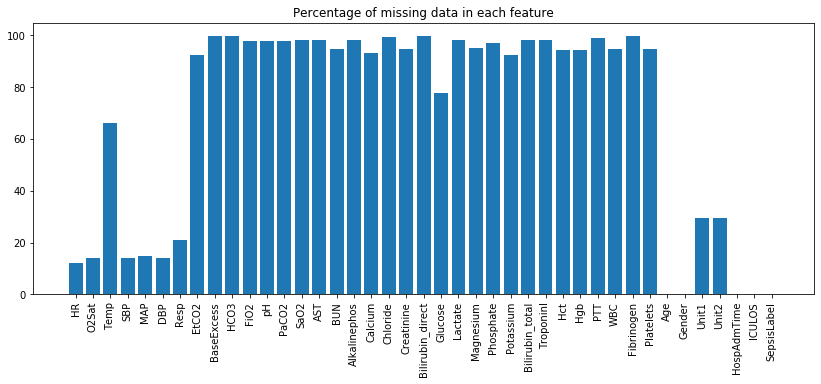

In [11]:
rcParams['figure.figsize'] = 14,5
_ = plt.bar(missing.index, missing)
_ = plt.xticks(missing.index, rotation=90)

plt.title("Percentage of missing data in each feature")

In [12]:
selected_cols = list(missing[missing < 90].index)
selected_cols

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'Glucose',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [13]:
filter_train = train[selected_cols]
filter_train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,71.5,93.0,36.72,108.0,74.0,NaN,16.5,NaN,70.79,1,1.0,0.0,-0.03,2,0
1,71.5,94.0,NaN,97.0,67.0,NaN,17.0,NaN,70.79,1,1.0,0.0,-0.03,3,0
2,75.0,95.0,36.61,100.0,70.0,NaN,17.0,68.0,70.79,1,1.0,0.0,-0.03,4,0
3,71.5,94.0,NaN,100.0,66.0,NaN,19.5,NaN,70.79,1,1.0,0.0,-0.03,5,0
4,72.5,95.5,NaN,100.0,71.0,NaN,18.0,NaN,70.79,1,1.0,0.0,-0.03,6,0


In [15]:
# Univariate PLots 
categorical = filter_train.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True 

In [16]:
cat_vars = list(categorical[categorical].index)
cont_vars = list(categorical[~categorical].index)
cont_vars.pop(-1)

'SepsisLabel'

/home/achintya/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


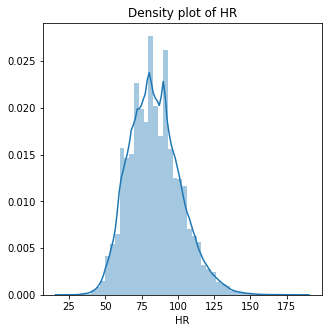

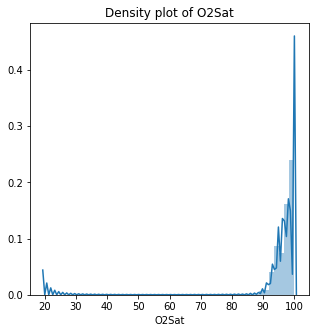

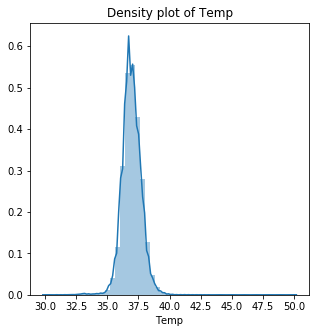

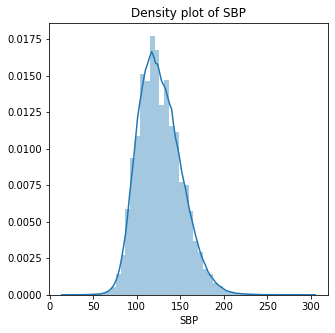

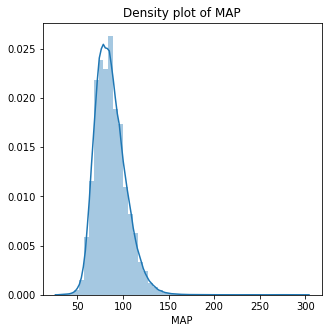

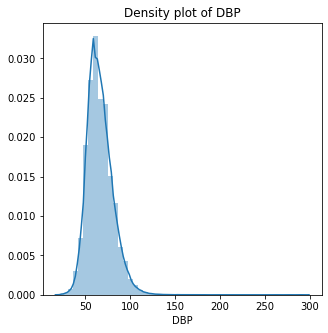

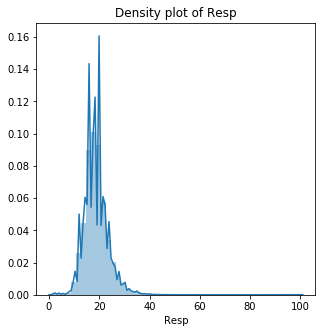

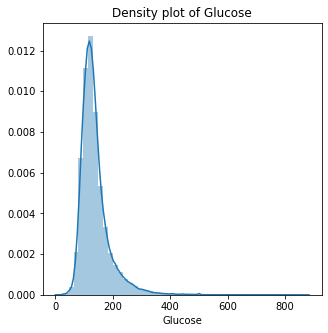

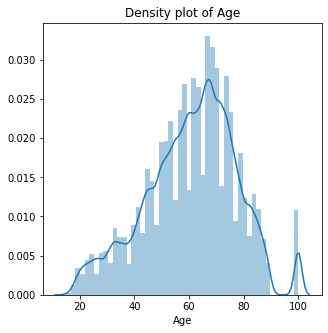

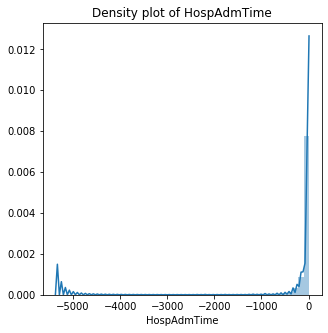

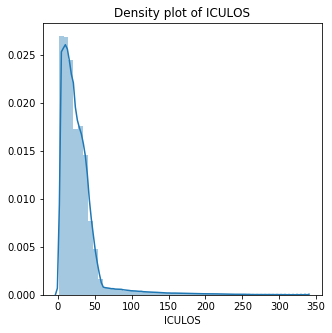

In [17]:
rcParams['figure.figsize'] = 5, 5
for i,var in enumerate(cont_vars):
    plt.figure(i)
    plt.title("Density plot of " + str(var))
    sns.distplot(filter_train[var].dropna(), axlabel=var);